# Problem Statement:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## Step 1: Importing Libararies

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)

## Step 2: Understanding The Data

In [2]:
# Loading the Data
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Get Shape of the dataset
df.shape

(9240, 37)

In [4]:
# Get info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
## Using Describe Function
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
## Get Null Count
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Get Unique values in the columns
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## Step 3: Cleaning the Data

Dropping the Propesct ID and Lead Number from the data set

In [8]:
df.drop(['Prospect ID','Lead Number'],axis=1, inplace = True)

In [9]:
df.shape

(9240, 35)

In [10]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
# Dropping the variables whose null values are greater than 40%
for i in df:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(i, 1, inplace = True)

In [13]:
df.shape

(9240, 30)

In [14]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [16]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

As there are multiple <b>Select</b> value present in the data frame. So we will be replacing this value with <b>NaN</b>

In [18]:
df=df.replace('Select',np.NaN)

In [19]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


In [20]:
# Dropping the unwanted columns
df.drop(['Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque','Magazine'],axis=1,inplace=True)

In [21]:
df.shape

(9240, 26)

In [22]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Now, Checking the columns individually

In [23]:
df['Country'].value_counts(normalize=True,dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

From the above analysis, we can see that India and NaN are very high. So we can drop the <b>Country</b> column.

In [24]:
df.drop(['Country'],axis=1,inplace=True)

In [25]:
df.shape

(9240, 25)

In [26]:
df['How did you hear about X Education'].value_counts(normalize=True,dropna=False)*100

NaN                      78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

<b>How did you hear about X Education</b> column has 78.4% NaN values. So we can drop this column

In [27]:
df.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [28]:
df.shape

(9240, 24)

In [29]:
df['Specialization'].value_counts(normalize=True,dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

- For NaN, we can write the new value by <b> Not Provided</b>
- We can replace Finance Management,Human Resource Management,Marketing Management,Operations Management,IT Projects Management,Supply Chain Management,Healthcare Management,Hospitality Management,Retail Management specializations by  <b>Management Course <b>
- We can replace Business Administration,E-Business,International Business,Rural and Agribusiness specializations by <b>Buinsess Courses</b>
- We can replace Banking, Investment And Insurance,Travel and Tourism,E-COMMERCE,Services Excellence specialization by <b>Industry Relevant Courses</b>

In [30]:
df['Specialization']=df['Specialization'].fillna('Not Provided')

In [31]:
df['Specialization']=df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],"Management Course")
df['Specialization']=df['Specialization'].replace(['Business Administration','E-Business','International Business','Rural and Agribusiness'],'Buinsess Courses')
df['Specialization']=df['Specialization'].replace(['Banking, Investment And Insurance','Travel and Tourism','E-COMMERCE','Services Excellence'],'Industry Relevant Courses')

In [32]:
df['Specialization'].value_counts(normalize=True,dropna=False)*100

Management Course            46.028139
Not Provided                 36.580087
Buinsess Courses              7.694805
Industry Relevant Courses     7.500000
Media and Advertising         2.196970
Name: Specialization, dtype: float64

In [33]:
df['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

We can fill Nan with <b>Unemployed</b> values.

In [34]:
df['What is your current occupation']=df['What is your current occupation'].fillna('Unemployed')

In [35]:
df['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

Combining the 'Other','Housewife' and 'Businessman' to <b> Other </b> value.

In [36]:
df['What is your current occupation']=df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Other')

In [37]:
df['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.367965
Name: What is your current occupation, dtype: float64

In [38]:
df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [39]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [40]:
df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [41]:
df['Lead Profile'].value_counts(normalize=True,dropna=False)*100

NaN                            74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

Dropping the <b>Lead Profile</b> column

In [42]:
df.drop(['Lead Profile'],axis=1,inplace=True)

In [43]:
df['City'].value_counts(normalize=True,dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

Filling NaN with <b>Not Provided</b> in City Column

In [44]:
df['City']=df['City'].fillna('Not given')

Replacing 'Thane & Outskirts' and 'Other Cities of Maharashtra' with <b> Maharashtra Cities </b>

In [45]:
df['City']=df["City"].replace(['Thane & Outskirts',"Other Cities of Maharashtra"],"Maharashtra Cities")

In [46]:
df['City'].value_counts(normalize=True,dropna=False)*100

Not given             39.707792
Mumbai                34.870130
Maharashtra Cities    13.084416
Other Cities           7.424242
Other Metro Cities     4.112554
Tier II Cities         0.800866
Name: City, dtype: float64

In [47]:
round(100*(df.isnull().sum()/len(df.index)), 2)
# round(100*df.isnull().sum()/df.shape[0],2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [48]:
df['Last Activity'].value_counts(normalize=True,dropna=False)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [49]:
df['Last Activity']=df['Last Activity'].replace(np.NaN,'Others')

In [50]:
df['Last Activity']=df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Visited Booth in Tradeshow','Resubscribed to emails','Email Marked Spam'],'Others')

In [51]:
df['Last Activity'].value_counts(normalize=True,dropna=False)*100

Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Others                        3.333333
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [52]:
df.shape

(9240, 23)

In [53]:
round(100*df.isnull().sum()/df.shape[0],2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [54]:
df=df.dropna()
df.shape

(5747, 23)

In [55]:
round(100*df.isnull().sum()/df.shape[0],2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Receive More Updates About Our Courses        

#### Conversion Ratio

Conversion Ratio = (Number of Users converted)/(Total Number of Users)

In [56]:
Conversion_Ratio= sum(df['Converted'])/len(df['Converted'].index)
Conversion_Ratio_Percentage = Conversion_Ratio*100
Conversion_Ratio_Percentage

45.50200104402297

Conversion Rate is <b>45.502 %</b>

## Step 4: Exploaratory Data Analysis (EDA)

In [57]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,Not given,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Not given,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Buinsess Courses,Student,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    5747 non-null   object 
 1   Lead Source                                    5747 non-null   object 
 2   Do Not Email                                   5747 non-null   object 
 3   Do Not Call                                    5747 non-null   object 
 4   Converted                                      5747 non-null   int64  
 5   TotalVisits                                    5747 non-null   float64
 6   Total Time Spent on Website                    5747 non-null   int64  
 7   Page Views Per Visit                           5747 non-null   float64
 8   Last Activity                                  5747 non-null   object 
 9   Specialization                                 5747 

In [59]:
cat_cols=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','Search','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','City','A free copy of Mastering The Interview','Last Notable Activity']

In [60]:
continous_cols=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#### Univariate Analysis

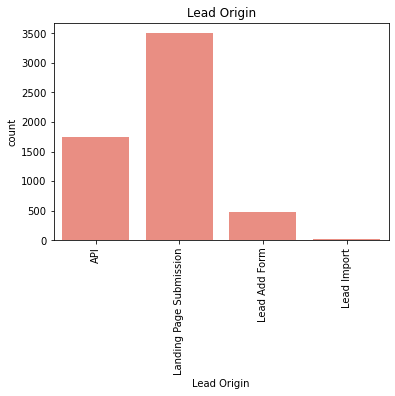

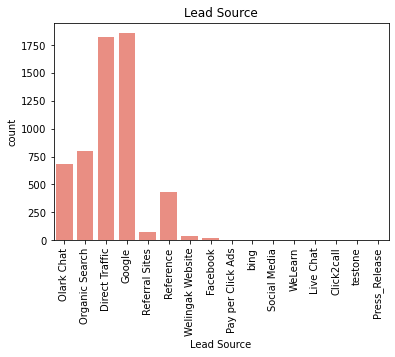

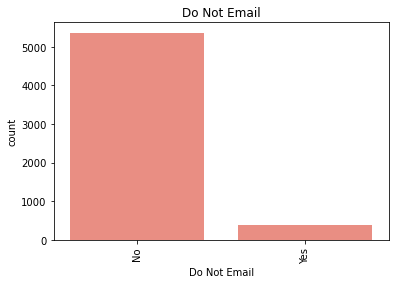

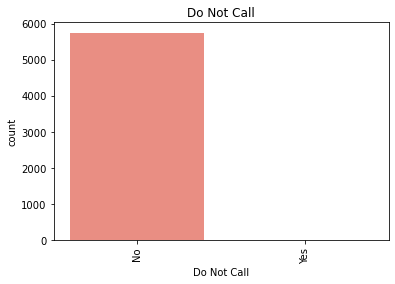

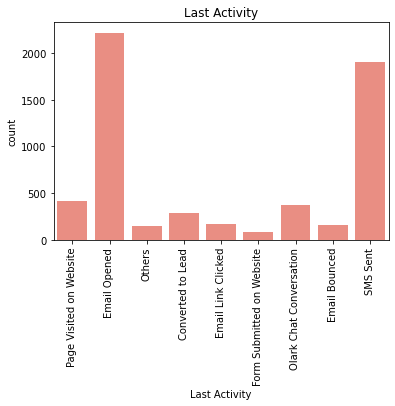

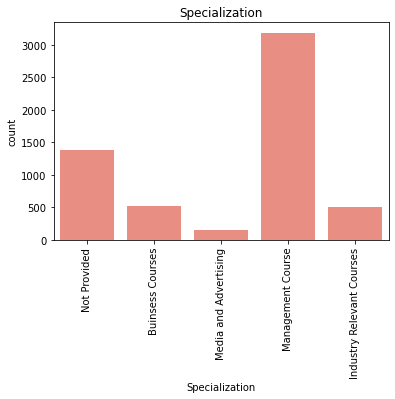

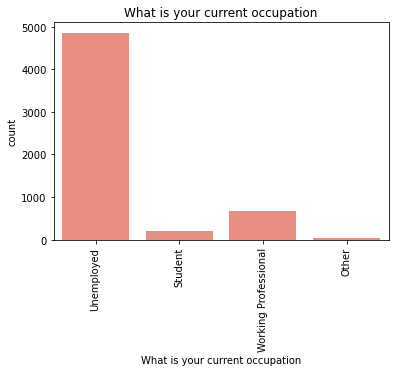

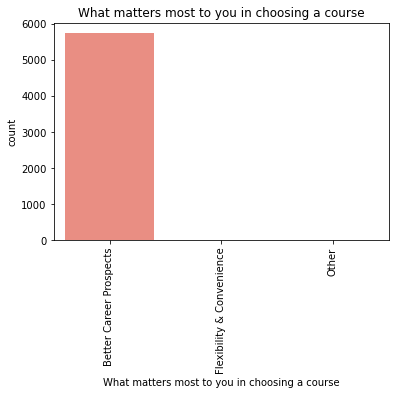

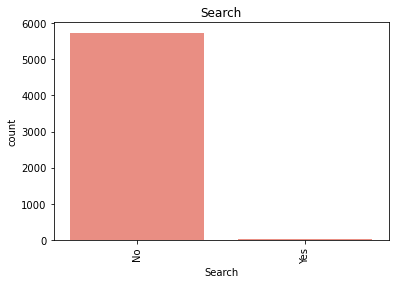

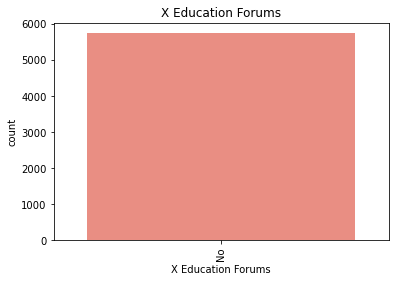

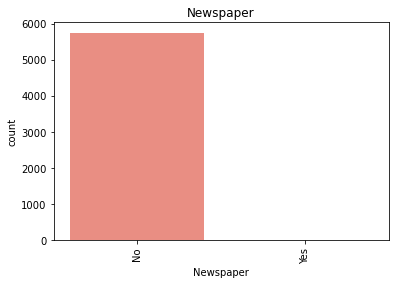

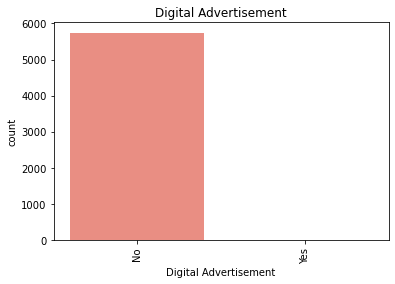

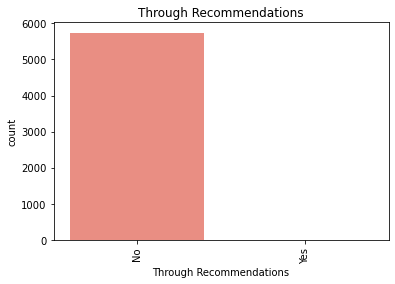

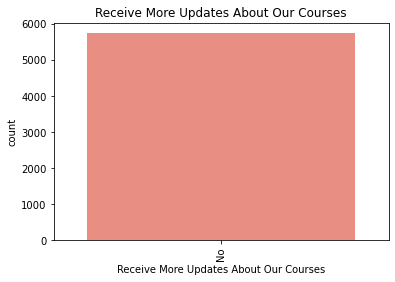

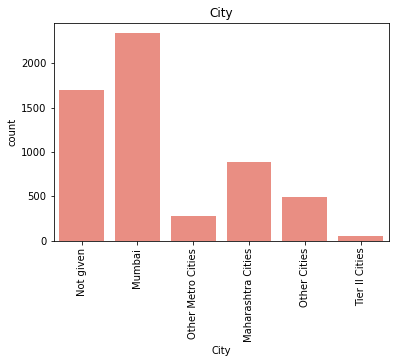

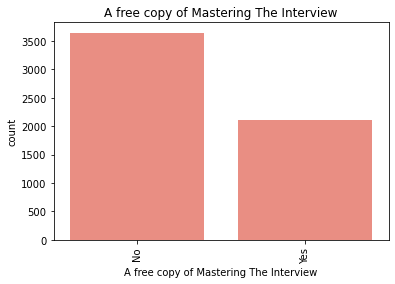

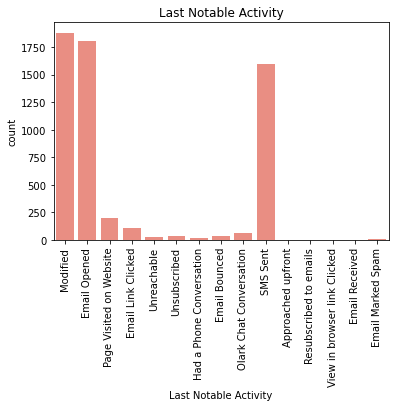

In [61]:
for i in cat_cols:
    sns.countplot(df[i],color="salmon")
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

<b>Inference from above plots:</b>
1. Lead Origin is highest for 'Landing Page Submission'.
2. Majority of the leads are from 'Google' followed by 'Direct Traffic'.
3. Majority of users have not opted for Email.
4. Majority of users have not opted for Call.
5. Most of the users Last Activity is that they have opened Email and then followed by SMS.
6. Out of all the specializations offerred, Management Course are in great demand.
7. There are large number of Unemployed.
8. 'Better Career Propects' plays a major role while choosing the course.
9. Almost no one wants to recieve the updates about courses.
10. Majority of Users are from MUmabia, followed by users have not mentioned there city.
11. Most of the users don't want a free copy og Mastering Interview.
12. The highest number of Last Notable activities are - Modified, Email Opened, SMS Sent.

#### Checking Outliers

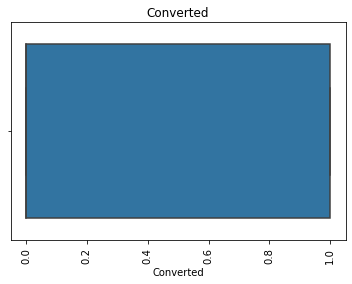

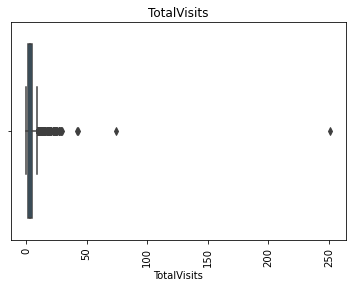

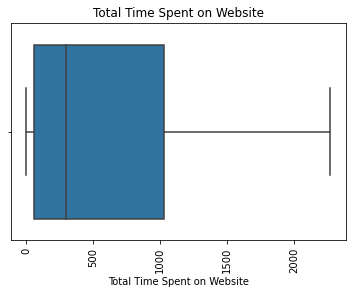

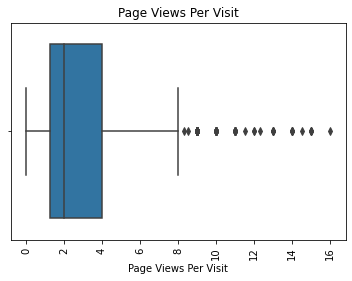

In [62]:
for i in continous_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

<b>Inference from above plots:</b>
1. There are no outliers present in 'Converted' and 'Total Time Spent on Website' columns.
2. There are outilers presnt in 'TotalVisits' and 'Page Views Per Visit' columns.

#### Outliers Treatment

In [63]:
df[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,5747.000000,5747.000000
mean,3.727336,2.579245
std,4.907139,2.062009
min,0.000000,0.000000
5%,0.000000,0.000000
25%,2.000000,1.250000
50%,3.000000,2.000000
75%,5.000000,4.000000
90%,8.000000,5.000000
95%,10.000000,6.000000


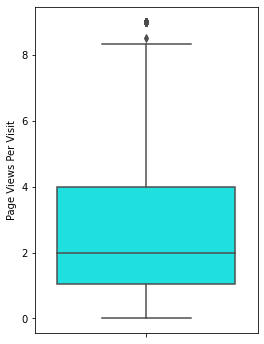

In [64]:
# Removing top and bottom 1 % values
plt.figure(figsize=(4,6))
Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit']<= Q3)]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[(df['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=df['Page Views Per Visit'],color="cyan")
plt.show()

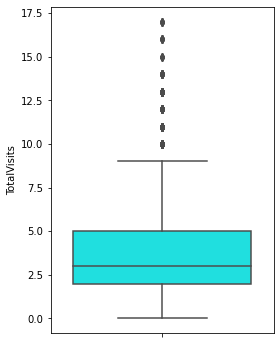

In [65]:
plt.figure(figsize=(4,6))
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'],color="cyan")
plt.show()

#### Bivariate Analysis of Categorical Columns

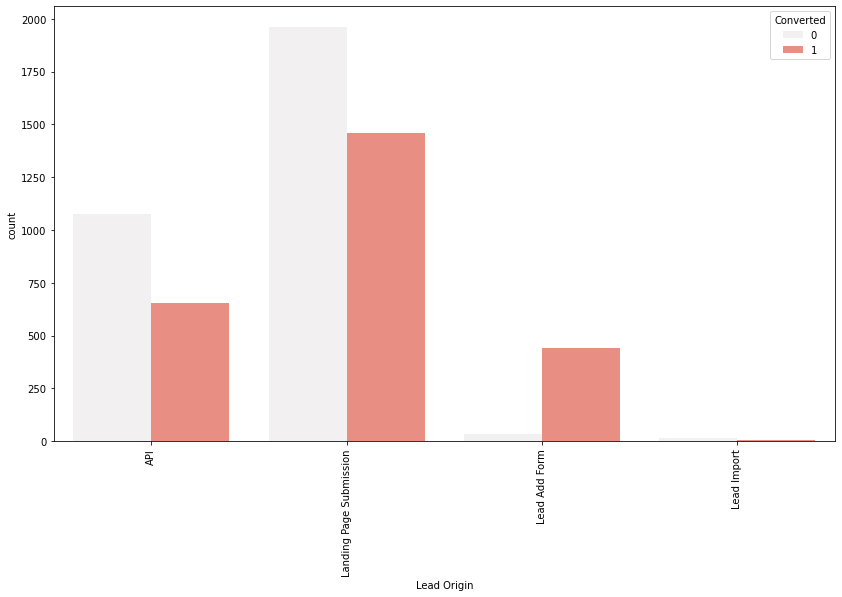

In [66]:
plt.figure(figsize=(14,8))
sns.countplot(df['Lead Origin'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

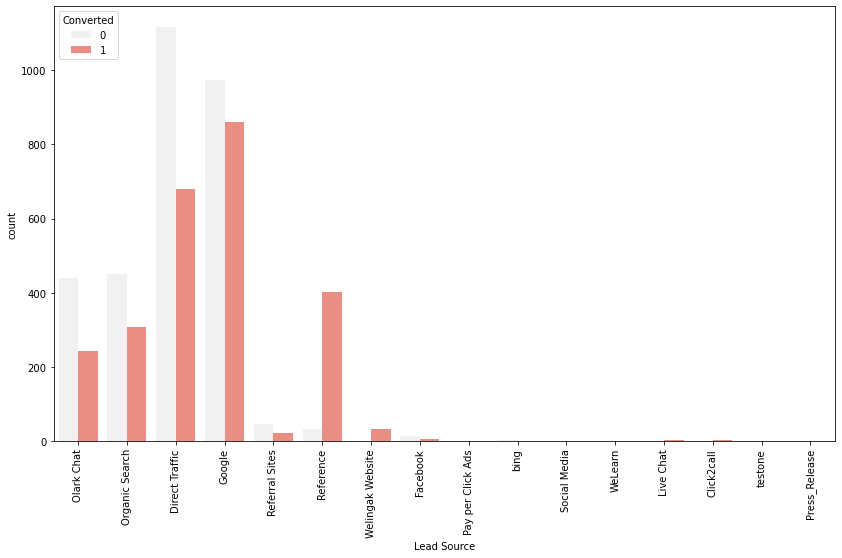

In [67]:
plt.figure(figsize=(14,8))
sns.countplot(df['Lead Source'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

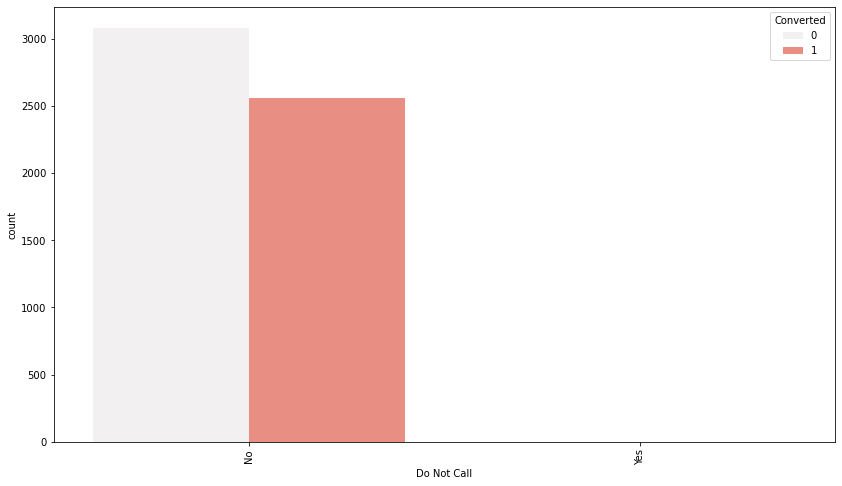

In [68]:
plt.figure(figsize=(14,8))
sns.countplot(df['Do Not Call'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

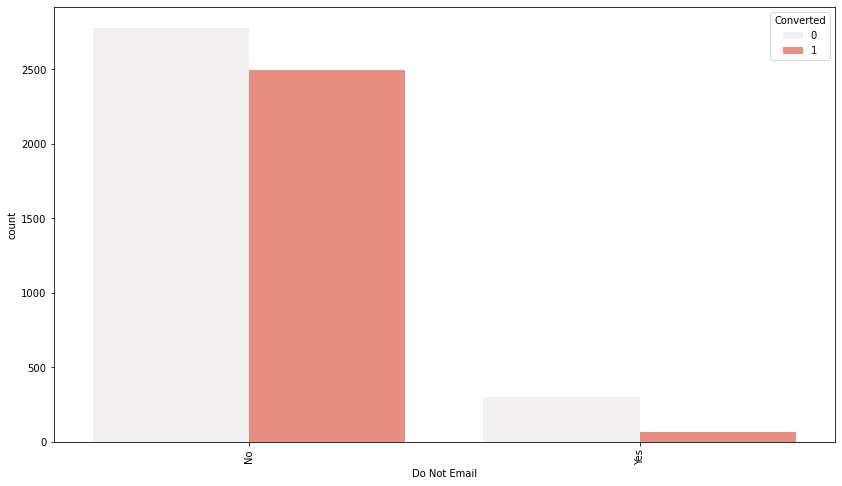

In [69]:
plt.figure(figsize=(14,8))
sns.countplot(df['Do Not Email'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

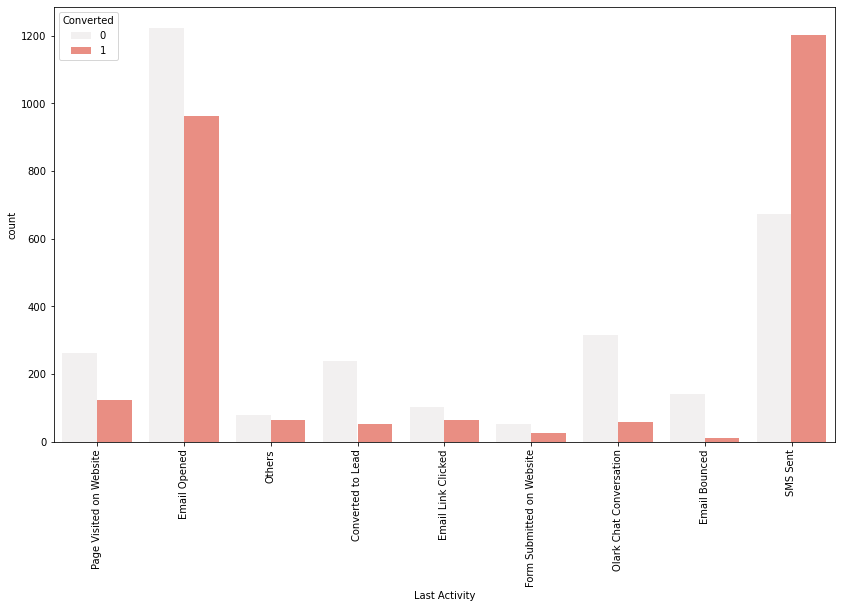

In [70]:
plt.figure(figsize=(14,8))
sns.countplot(df['Last Activity'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

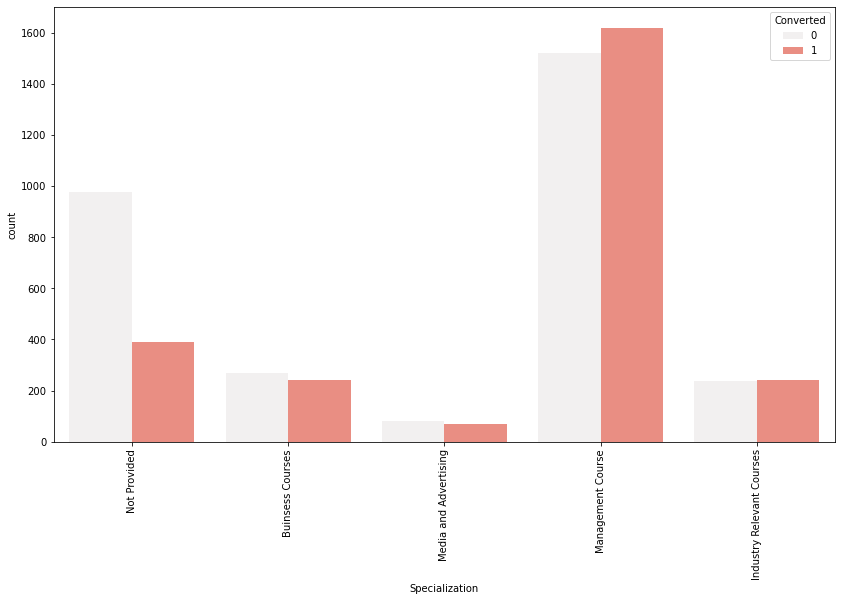

In [71]:
plt.figure(figsize=(14,8))
sns.countplot(df['Specialization'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

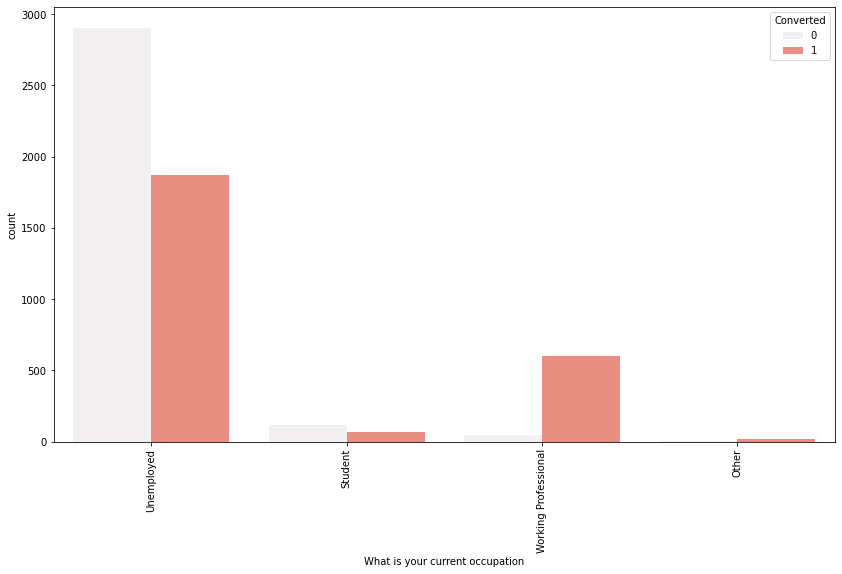

In [72]:
plt.figure(figsize=(14,8))
sns.countplot(df['What is your current occupation'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

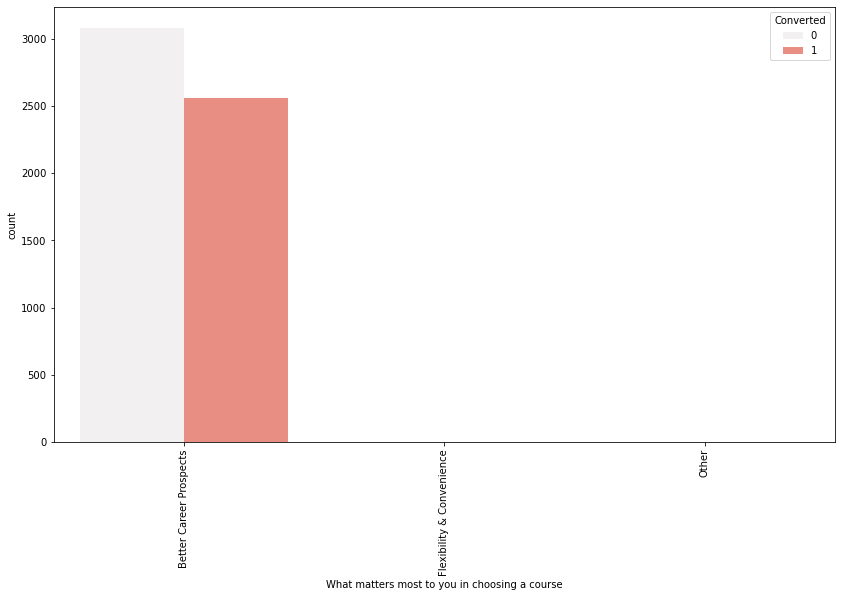

In [73]:
plt.figure(figsize=(14,8))
sns.countplot(df['What matters most to you in choosing a course'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

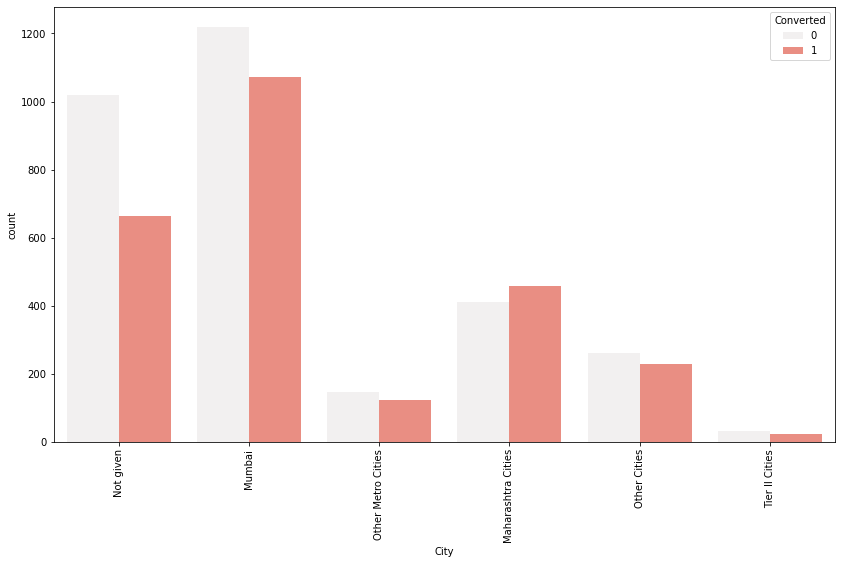

In [74]:
plt.figure(figsize=(14,8))
sns.countplot(df['City'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

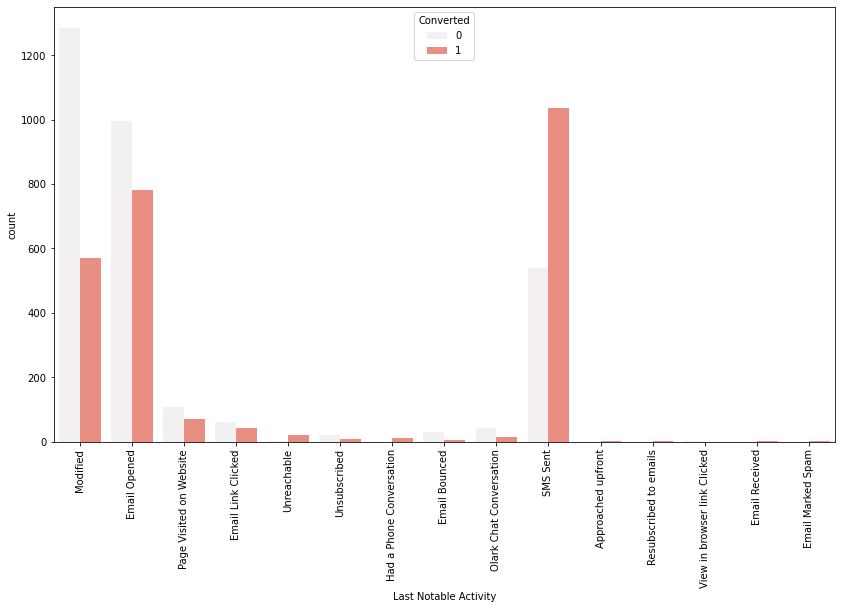

In [75]:
plt.figure(figsize=(14,8))
sns.countplot(df['Last Notable Activity'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

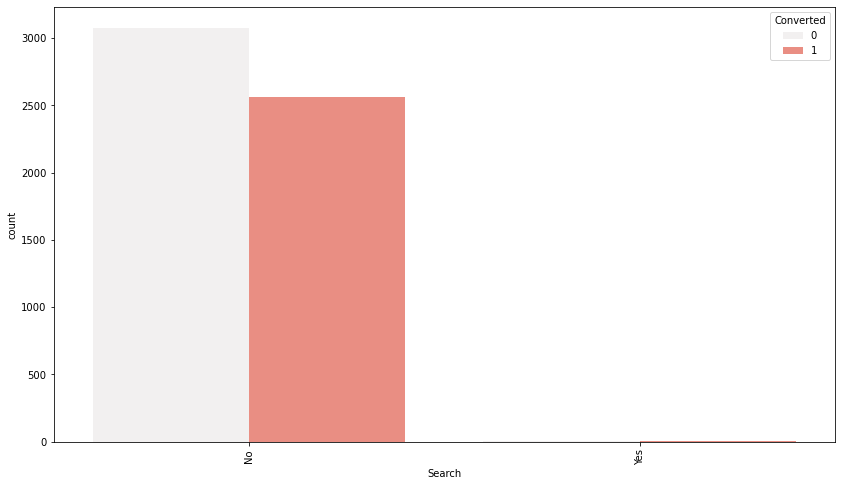

In [76]:
plt.figure(figsize=(14,8))
sns.countplot(df['Search'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

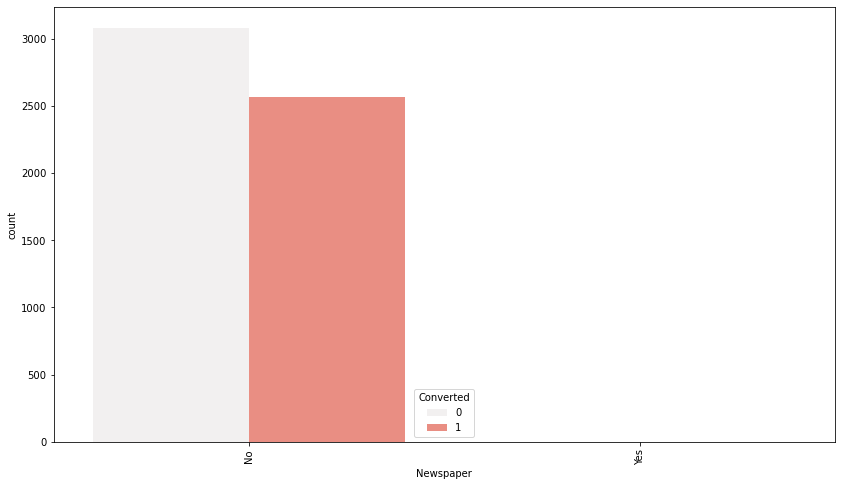

In [77]:
plt.figure(figsize=(14,8))
sns.countplot(df['Newspaper'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

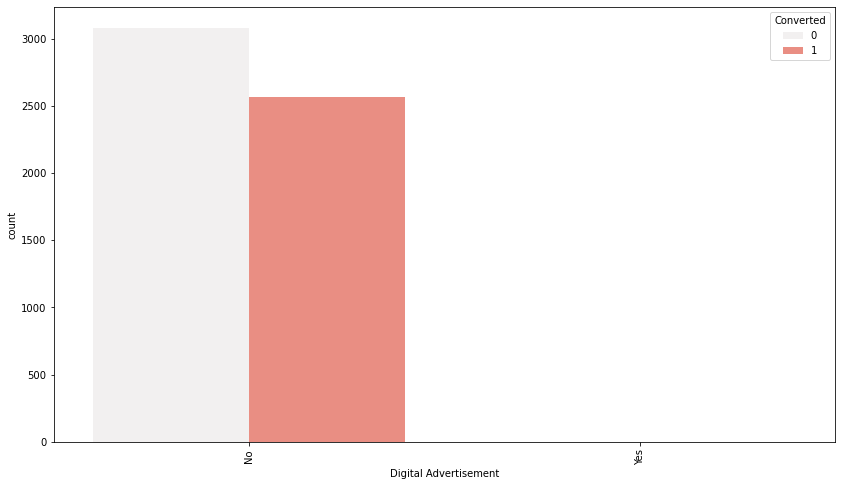

In [78]:
plt.figure(figsize=(14,8))
sns.countplot(df['Digital Advertisement'],hue=df.Converted,color="salmon")
plt.xticks(rotation=90)
plt.show()

<b>Inference From above plots:</b>
1. <b>Landing on the Page Submission</b> gets the most converted.
2. Leads from <b>Direct Traffice</b> converts the most and then followed by <b>Google</b>
3. Users who 'Opened Mail' gets converted the most.
4. Users who 'Sent SMS' gets converted the most.
5. Unemeployed and Working Progfessions gets converted.
6. People who want Better career prospects will choose a course.
7. People with No cities Provided and living in Mumabia or other Maharashta Cities will take the course.
8. Users who have said no to Newspaper and Digital Advertisemnt will get converted.
9. Users who have said No to EMail and Calls will get converted.

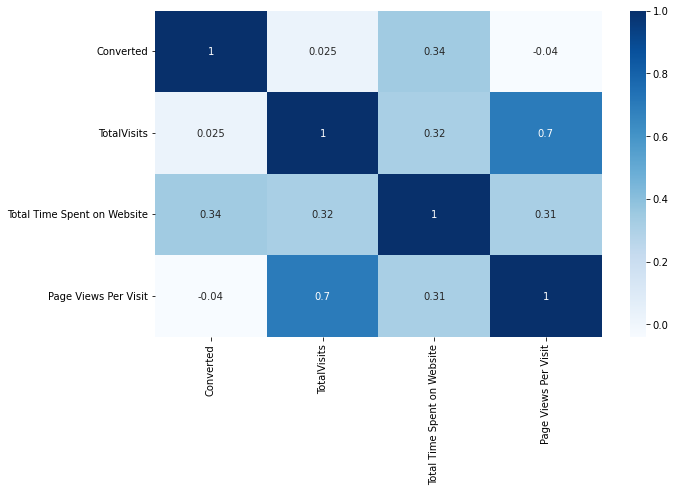

In [79]:
# Co-realtion between the numerical columns.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

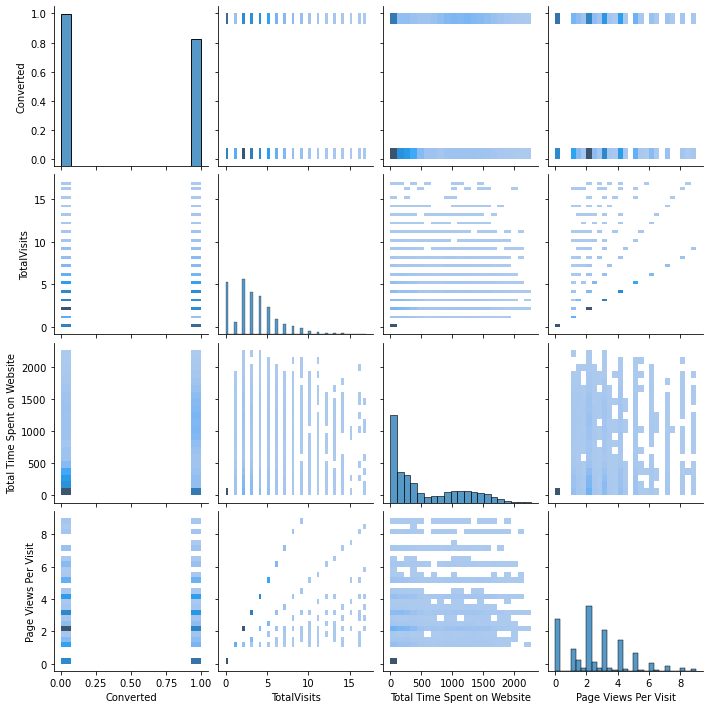

In [80]:
# Visualizing the co-realtion between the numerical columns.
sns.pairplot(df[continous_cols],kind="hist")
plt.show()

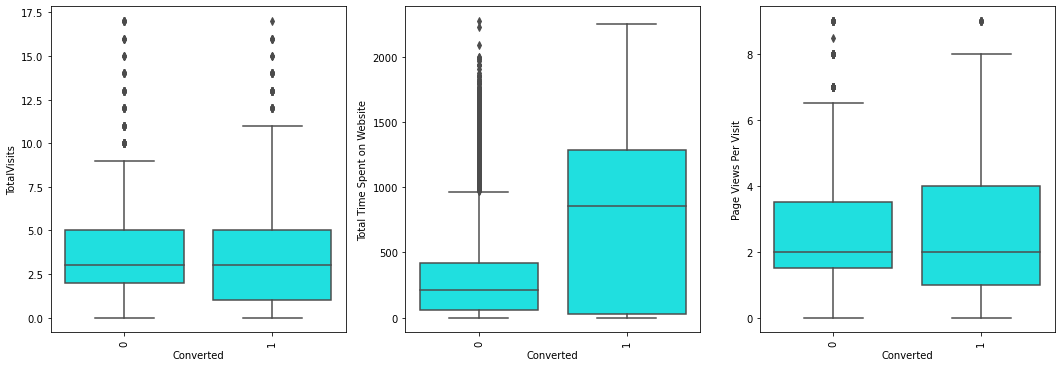

In [81]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='Converted',y='TotalVisits',color="cyan")
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(data=df,x='Converted',y='Total Time Spent on Website',color="cyan")
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.boxplot(data=df,x='Converted',y='Page Views Per Visit',color="cyan")
plt.xticks(rotation=90)
plt.show()

## Step 5: Data Prepration

#### Dummy Variables

In [82]:
df.shape

(5646, 23)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5646 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    5646 non-null   object 
 1   Lead Source                                    5646 non-null   object 
 2   Do Not Email                                   5646 non-null   object 
 3   Do Not Call                                    5646 non-null   object 
 4   Converted                                      5646 non-null   int64  
 5   TotalVisits                                    5646 non-null   float64
 6   Total Time Spent on Website                    5646 non-null   int64  
 7   Page Views Per Visit                           5646 non-null   float64
 8   Last Activity                                  5646 non-null   object 
 9   Specialization                                 5646 

In [84]:
# Dropping Unwanted columns from df
dropped_columns=['Search','Newspaper','Newspaper Article','Digital Advertisement','X Education Forums','Through Recommendations','Receive More Updates About Our Courses']
df.drop(dropped_columns, axis=1, inplace=True)

In [85]:
category_cols = df.select_dtypes(include=['object']).columns
category_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [86]:
# Converting the variables to binary form
binary_vartiables=['A free copy of Mastering The Interview', 'Do Not Email','Do Not Call']
def binary_mapping(x):
    return x.map({'Yes':1,'No':0})
df[binary_vartiables] = df[binary_vartiables].apply(binary_mapping)

In [87]:
Lo=pd.get_dummies(df['Lead Origin'],prefix='Lead_Origin')
Ls=pd.get_dummies(df['Lead Source'],prefix="Lead_Source")
La=pd.get_dummies(df['Last Activity'],prefix="Last_Activity")
Sp=pd.get_dummies(df['Specialization'],prefix="Specialization")
Oc=pd.get_dummies(df['What is your current occupation'],prefix="Occu")
C=pd.get_dummies(df['What matters most to you in choosing a course'],prefix="Course")
LNA=pd.get_dummies(df['Last Notable Activity'],prefix= "Last_Notable_Activity")
CT=pd.get_dummies(df['City'],prefix= "City")
df=pd.concat([Lo,Ls,La,Sp,Oc,C,LNA,CT,df],axis=1)

In [88]:
# Dropping the columns aftewr adding dummies
df.drop(category_cols,axis=1,inplace=True)

In [89]:
df.shape

(5646, 66)

#### Splitting the data to Train and Test data

In [90]:
X=df.drop(['Converted'],axis=1)
y=df['Converted']

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [92]:
#scaling numerical variables
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,...,Course_Other,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,City_Maharashtra Cities,City_Mumbai,City_Not given,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2366,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.915370,-0.093324,1.090739
1625,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.141571,1.698744,0.285767
7288,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,-1.170041,-0.966246,-1.324178
2220,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.484394,-0.171549,-0.250882
7417,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.484394,1.880084,-0.250882


#### Calculating Recursive Feature Elimination (RFE)

In [93]:
logreg=LogisticRegression()
## Going with 15 Variables
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [94]:
rfe_select_cols=X_train.columns[rfe.support_]
rfe_select_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Reference',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Others',
       'Last_Activity_SMS Sent', 'Specialization_Not Provided',
       'Occu_Working Professional',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Unreachable', 'City_Not given',
       'Total Time Spent on Website'],
      dtype='object')

In [95]:
rfe_not_select_cols=X_train.columns[~rfe.support_]
rfe_not_select_cols

Index(['Lead_Origin_API', 'Lead_Origin_Lead Import', 'Lead_Source_Click2call',
       'Lead_Source_Direct Traffic', 'Lead_Source_Facebook',
       'Lead_Source_Google', 'Lead_Source_Live Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Pay per Click Ads',
       'Lead_Source_Press_Release', 'Lead_Source_Referral Sites',
       'Lead_Source_Social Media', 'Lead_Source_WeLearn', 'Lead_Source_bing',
       'Lead_Source_testone', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Link Clicked',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website',
       'Specialization_Buinsess Courses',
       'Specialization_Industry Relevant Courses',
       'Specialization_Management Course',
       'Specialization_Media and Advertising', 'Occu_Other', 'Occu_Student',
       'Occu_Unemployed', 'Course_Better Career Prospects',
       'Course_Flexibility & Convenience', 'Course_Other',
      

## Step 6: Model Building

### Model 1

In [96]:
X_train_sm = sm.add_constant(X_train[rfe_select_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3936
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1741.3
Date:                Sun, 07 Aug 2022   Deviance:                       3482.6
Time:                        20:41:32   Pearson chi2:                 4.58e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6902      0.179     -3.845      0.000      -1.042      -0.338
Lead_Origin_Landing Page Submission               -1.0466      0.162     -6.446      0.000      -1.365      -0.728
Lead_Origin_Lead Add Form                          1.9324      1.262      1.531      0.126      -0.542       4.406
Lead_Source_Olark Chat                             1.3989      0.168      8.335      0.000       1.070       1.728
Lead_Source_Reference                              1.7456      1.280      1.364      0.173      -0.763       4.254
Lead_Source_Welingak Website                      23.3797   1.34e+04      0.002      0.999   -2.62e+04    2.62e+04
Last_Activity_Email Bounced                       -0.8577      0.386     -2.219      0.026      -1.615      -0.100
Last_Activity_Email Opened                         0.8975      0.119      7.548      0.000       0.664       1.131
Last_Activity_Others                               0.7009      0.325      2.157      0.031       0.064       1.338
Last_Activity_SMS Sent                             1.6592      0.124     13.434      0.000       1.417       1.901
Specialization_Not Provided                       -0.8329      0.181     -4.608      0.000      -1.187      -0.479
Occu_Working Professional                          2.6786      0.202     13.277      0.000       2.283       3.074
Last_Notable_Activity_Had a Phone Conversation    23.7042   2.44e+04      0.001      0.999   -4.78e+04    4.79e+04
Last_Notable_Activity_Unreachable                  3.2028      1.143      2.803      0.005       0.964       5.442
City_Not given                                    -0.8941      0.187     -4.792      0.000      -1.260      -0.528
Total Time Spent on Website                        1.1323      0.050     22.802      0.000       1.035       1.230
==================================================================================================================
"""

In [97]:
# Calculating the VIF of different columns
vif=pd.DataFrame()
vif['Features']=X_train[rfe_select_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_select_cols].values,i) for i in range (X_train[rfe_select_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Lead_Origin_Lead Add Form,111.14
3,Lead_Source_Reference,101.54
4,Lead_Source_Welingak Website,10.34
13,City_Not given,4.23
9,Specialization_Not Provided,3.70
0,Lead_Origin_Landing Page Submission,2.77
8,Last_Activity_SMS Sent,2.28
6,Last_Activity_Email Opened,2.25
2,Lead_Source_Olark Chat,1.60
7,Last_Activity_Others,1.38


As VIF of <b>Lead_Origin_Lead Add Form</b> is very high, So we will drop this column.

In [98]:
rfe_select_cols=rfe_select_cols.drop('Lead_Origin_Lead Add Form')
rfe_select_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not Provided', 'Occu_Working Professional',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Unreachable', 'City_Not given',
       'Total Time Spent on Website'],
      dtype='object')

### Model 2

In [99]:
X_train_sm = sm.add_constant(X_train[rfe_select_cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3937
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1742.6
Date:                Sun, 07 Aug 2022   Deviance:                       3485.2
Time:                        20:41:32   Pearson chi2:                 4.58e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6683      0.179     -3.734      0.000      -1.019      -0.317
Lead_Origin_Landing Page Submission               -1.0691      0.162     -6.602      0.000      -1.386      -0.752
Lead_Source_Olark Chat                             1.3825      0.167      8.257      0.000       1.054       1.711
Lead_Source_Reference                              3.6595      0.272     13.453      0.000       3.126       4.193
Lead_Source_Welingak Website                      25.2960   1.34e+04      0.002      0.998   -2.62e+04    2.62e+04
Last_Activity_Email Bounced                       -0.8558      0.386     -2.215      0.027      -1.613      -0.099
Last_Activity_Email Opened                         0.9006      0.119      7.578      0.000       0.668       1.134
Last_Activity_Others                               0.7010      0.325      2.159      0.031       0.065       1.337
Last_Activity_SMS Sent                             1.6609      0.123     13.453      0.000       1.419       1.903
Specialization_Not Provided                       -0.8383      0.181     -4.640      0.000      -1.192      -0.484
Occu_Working Professional                          2.6746      0.202     13.262      0.000       2.279       3.070
Last_Notable_Activity_Had a Phone Conversation    23.7017   2.44e+04      0.001      0.999   -4.78e+04    4.79e+04
Last_Notable_Activity_Unreachable                  3.1959      1.142      2.798      0.005       0.957       5.435
City_Not given                                    -0.9022      0.187     -4.836      0.000      -1.268      -0.537
Total Time Spent on Website                        1.1285      0.050     22.773      0.000       1.031       1.226
==================================================================================================================
"""

In [100]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_select_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_select_cols].values,i) for i in range (X_train[rfe_select_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,City_Not given,4.23
8,Specialization_Not Provided,3.70
0,Lead_Origin_Landing Page Submission,2.76
7,Last_Activity_SMS Sent,2.27
5,Last_Activity_Email Opened,2.24
1,Lead_Source_Olark Chat,1.60
2,Lead_Source_Reference,1.49
6,Last_Activity_Others,1.38
9,Occu_Working Professional,1.32
13,Total Time Spent on Website,1.26


From Above 2 we can see that the p value of <b>Last_Notable_Activity_Had a Phone Conversation</b> is very hig. So dropping this column

In [101]:
rfe_select_cols=rfe_select_cols.drop('Last_Notable_Activity_Had a Phone Conversation')
rfe_select_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not Provided', 'Occu_Working Professional',
       'Last_Notable_Activity_Unreachable', 'City_Not given',
       'Total Time Spent on Website'],
      dtype='object')

### Model 3

In [102]:
X_train_sm = sm.add_constant(X_train[rfe_select_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3938
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1747.3
Date:                Sun, 07 Aug 2022   Deviance:                       3494.7
Time:                        20:41:32   Pearson chi2:                 4.59e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.6617      0.179     -3.705      0.000      -1.012      -0.312
Lead_Origin_Landing Page Submission    -1.0749      0.161     -6.662      0.000      -1.391      -0.759
Lead_Source_Olark Chat                  1.3798      0.167      8.246      0.000       1.052       1.708
Lead_Source_Reference                   3.6576      0.272     13.447      0.000       3.124       4.191
Lead_Source_Welingak Website           25.2952   1.33e+04      0.002      0.998   -2.61e+04    2.62e+04
Last_Activity_Email Bounced            -0.8556      0.386     -2.214      0.027      -1.613      -0.098
Last_Activity_Email Opened              0.9002      0.119      7.573      0.000       0.667       1.133
Last_Activity_Others                    0.9448      0.302      3.128      0.002       0.353       1.537
Last_Activity_SMS Sent                  1.6609      0.123     13.451      0.000       1.419       1.903
Specialization_Not Provided            -0.8416      0.181     -4.661      0.000      -1.196      -0.488
Occu_Working Professional               2.6731      0.202     13.252      0.000       2.278       3.068
Last_Notable_Activity_Unreachable       2.9509      1.136      2.597      0.009       0.724       5.178
City_Not given                         -0.9073      0.186     -4.867      0.000      -1.273      -0.542
Total Time Spent on Website             1.1285      0.049     22.799      0.000       1.031       1.226
=======================================================================================================
"""

In [103]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_select_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_select_cols].values,i) for i in range (X_train[rfe_select_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,City_Not given,4.23
8,Specialization_Not Provided,3.70
0,Lead_Origin_Landing Page Submission,2.76
7,Last_Activity_SMS Sent,2.27
5,Last_Activity_Email Opened,2.24
1,Lead_Source_Olark Chat,1.60
2,Lead_Source_Reference,1.49
9,Occu_Working Professional,1.32
6,Last_Activity_Others,1.26
12,Total Time Spent on Website,1.25


From above, we can see that <b>Lead_Source_Welingak Website</b> has highest p value, so dropping this column

In [104]:
rfe_select_cols=rfe_select_cols.drop('Lead_Source_Welingak Website')
rfe_select_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Others',
       'Last_Activity_SMS Sent', 'Specialization_Not Provided',
       'Occu_Working Professional', 'Last_Notable_Activity_Unreachable',
       'City_Not given', 'Total Time Spent on Website'],
      dtype='object')

### Model 4

In [105]:
X_train_sm = sm.add_constant(X_train[rfe_select_cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3939
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1792.6
Date:                Sun, 07 Aug 2022   Deviance:                       3585.2
Time:                        20:41:33   Pearson chi2:                 4.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4589      0.174     -2.639      0.008      -0.800      -0.118
Lead_Origin_Landing Page Submission    -1.2710      0.158     -8.060      0.000      -1.580      -0.962
Lead_Source_Olark Chat                  1.1154      0.162      6.903      0.000       0.799       1.432
Lead_Source_Reference                   3.4018      0.269     12.644      0.000       2.875       3.929
Last_Activity_Email Bounced            -0.8588      0.383     -2.243      0.025      -1.609      -0.108
Last_Activity_Email Opened              0.9093      0.117      7.766      0.000       0.680       1.139
Last_Activity_Others                    0.9204      0.299      3.083      0.002       0.335       1.506
Last_Activity_SMS Sent                  1.6774      0.122     13.784      0.000       1.439       1.916
Specialization_Not Provided            -0.7640      0.177     -4.305      0.000      -1.112      -0.416
Occu_Working Professional               2.6325      0.200     13.132      0.000       2.240       3.025
Last_Notable_Activity_Unreachable       2.8695      1.128      2.545      0.011       0.659       5.080
City_Not given                         -0.9710      0.183     -5.307      0.000      -1.330      -0.612
Total Time Spent on Website             1.0758      0.048     22.235      0.000       0.981       1.171
=======================================================================================================
"""

In [106]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_select_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_select_cols].values,i) for i in range (X_train[rfe_select_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,City_Not given,4.23
7,Specialization_Not Provided,3.68
0,Lead_Origin_Landing Page Submission,2.74
6,Last_Activity_SMS Sent,2.25
4,Last_Activity_Email Opened,2.22
1,Lead_Source_Olark Chat,1.58
2,Lead_Source_Reference,1.48
8,Occu_Working Professional,1.32
5,Last_Activity_Others,1.26
11,Total Time Spent on Website,1.25


<b>Last_Activity_Email Bounced</b> has highest p value so dropping this column.

<b><i>City_Not given</i></b> has highest VIF (Though leass than 5 but trying if we can pull it more down), so dropping this column too.

In [107]:
rfe_select_cols=rfe_select_cols.drop('Last_Activity_Email Bounced')
rfe_select_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not Provided', 'Occu_Working Professional',
       'Last_Notable_Activity_Unreachable', 'City_Not given',
       'Total Time Spent on Website'],
      dtype='object')

In [108]:
rfe_select_cols=rfe_select_cols.drop('City_Not given')
rfe_select_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not Provided', 'Occu_Working Professional',
       'Last_Notable_Activity_Unreachable', 'Total Time Spent on Website'],
      dtype='object')

### Model 4

In [109]:
X_train_sm = sm.add_constant(X_train[rfe_select_cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3941
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1810.0
Date:                Sun, 07 Aug 2022   Deviance:                       3620.0
Time:                        20:41:33   Pearson chi2:                 4.39e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.8457      0.159     -5.334      0.000      -1.156      -0.535
Lead_Origin_Landing Page Submission    -0.9829      0.144     -6.809      0.000      -1.266      -0.700
Lead_Source_Olark Chat                  1.0697      0.160      6.700      0.000       0.757       1.383
Lead_Source_Reference                   3.3480      0.268     12.515      0.000       2.824       3.872
Last_Activity_Email Opened              1.0240      0.113      9.076      0.000       0.803       1.245
Last_Activity_Others                    1.0137      0.296      3.422      0.001       0.433       1.594
Last_Activity_SMS Sent                  1.7405      0.118     14.773      0.000       1.510       1.971
Specialization_Not Provided            -1.3232      0.147     -9.031      0.000      -1.610      -1.036
Occu_Working Professional               2.5832      0.202     12.797      0.000       2.188       2.979
Last_Notable_Activity_Unreachable       2.9061      1.119      2.597      0.009       0.713       5.099
Total Time Spent on Website             1.0727      0.048     22.314      0.000       0.978       1.167
=======================================================================================================
"""

In [110]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_select_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_select_cols].values,i) for i in range (X_train[rfe_select_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Lead_Origin_Landing Page Submission,2.43
3,Last_Activity_Email Opened,2.08
5,Last_Activity_SMS Sent,2.06
6,Specialization_Not Provided,1.63
1,Lead_Source_Olark Chat,1.54
2,Lead_Source_Reference,1.40
4,Last_Activity_Others,1.25
9,Total Time Spent on Website,1.25
7,Occu_Working Professional,1.24
8,Last_Notable_Activity_Unreachable,1.19


From above we can see that- <b>Last_Notable_Activity_Unreachable</b> has highest p value, so dropping this column

In [111]:
rfe_select_cols=rfe_select_cols.drop('Last_Notable_Activity_Unreachable')
rfe_select_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not Provided', 'Occu_Working Professional',
       'Total Time Spent on Website'],
      dtype='object')

### Model 5

In [112]:
X_train_sm = sm.add_constant(X_train[rfe_select_cols])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3942
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1815.5
Date:                Sun, 07 Aug 2022   Deviance:                       3631.1
Time:                        20:41:33   Pearson chi2:                 4.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.8283      0.158     -5.237      0.000      -1.138      -0.518
Lead_Origin_Landing Page Submission    -1.0031      0.144     -6.969      0.000      -1.285      -0.721
Lead_Source_Olark Chat                  1.0607      0.159      6.661      0.000       0.749       1.373
Lead_Source_Reference                   3.3416      0.267     12.503      0.000       2.818       3.865
Last_Activity_Email Opened              1.0243      0.113      9.076      0.000       0.803       1.245
Last_Activity_Others                    1.3530      0.267      5.062      0.000       0.829       1.877
Last_Activity_SMS Sent                  1.7413      0.118     14.777      0.000       1.510       1.972
Specialization_Not Provided            -1.3360      0.146     -9.141      0.000      -1.622      -1.050
Occu_Working Professional               2.5807      0.202     12.776      0.000       2.185       2.977
Total Time Spent on Website             1.0721      0.048     22.328      0.000       0.978       1.166
=======================================================================================================
"""

In [113]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_select_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_select_cols].values,i) for i in range (X_train[rfe_select_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Lead_Origin_Landing Page Submission,2.43
3,Last_Activity_Email Opened,2.08
5,Last_Activity_SMS Sent,2.06
6,Specialization_Not Provided,1.63
1,Lead_Source_Olark Chat,1.54
2,Lead_Source_Reference,1.40
8,Total Time Spent on Website,1.25
7,Occu_Working Professional,1.24
4,Last_Activity_Others,1.06


#### All vales are fine now so finalizaing the <u>Model 5</u>

In [114]:
#Now getting the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2366    0.287577
1625    0.986768
7288    0.971209
2220    0.270706
7417    0.872752
8070    0.996980
6183    0.395425
8278    0.246598
4585    0.221536
6459    0.201031
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28757704, 0.98676755, 0.97120927, 0.27070587, 0.87275191,
       0.9969797 , 0.3954251 , 0.24659807, 0.22153591, 0.20103073])

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID']=y_train_pred

In [117]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.287577,0.287577
1,1,0.986768,0.986768
2,1,0.971209,0.971209
3,0,0.270706,0.270706
4,0,0.872752,0.872752


Now creating the Predicted column with value <i>equal to 1 if Prospect ID is greater than 0.5 else 0</i>

In [118]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [119]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.287577,0.287577,0
1,1,0.986768,0.986768,1
2,1,0.971209,0.971209,1
3,0,0.270706,0.270706,0
4,0,0.872752,0.872752,1


In [120]:
# Checking the accuracy of Train Model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7940283400809717


In [121]:
# Creating the confusion matrix
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_mat)

[[1839  308]
 [ 506 1299]]


In [122]:
# True Positive
TP = confusion_mat[1,1]
print("TP:",TP)
# True Negative
TN = confusion_mat[0,0]
print("TN:",TN)
#False Positive
FP = confusion_mat[0,1]
print("FP:",FP)
#False Negative
FN = confusion_mat[1,0]
print("FN:",FN)

TP: 1299
TN: 1839
FP: 308
FN: 506


In [123]:
# Senstivity of Logistic Regression Model
Senstivity = TP / float(TP+FN)
print("Senstivity:",Senstivity)

Senstivity: 0.7196675900277009


In [124]:
# Specificity of Logistic Regression Model
Specificity = TN / float(TN+FP)
print("Specificity:",Specificity)

Specificity: 0.8565440149045179


In [125]:
# False Postive Rate
False_positive_rate = (FP/(float(TN+FP)))
print("False Positive Rate:",False_positive_rate)

False Positive Rate: 0.14345598509548207


In [126]:
# Positive Predictive Value
Positive_predictive_value = (TP /(float(TP+FP)))
print("Positive Predictive Value:",Positive_predictive_value)

Positive Predictive Value: 0.8083385189794648


In [127]:
# Negative Predictive Value
Negative_predictive_value = (TN /(float(TN+ FN)))
print("Negative Predictive Value:",Negative_predictive_value)

Negative Predictive Value: 0.7842217484008529


#### Plotting ROC Curve

In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

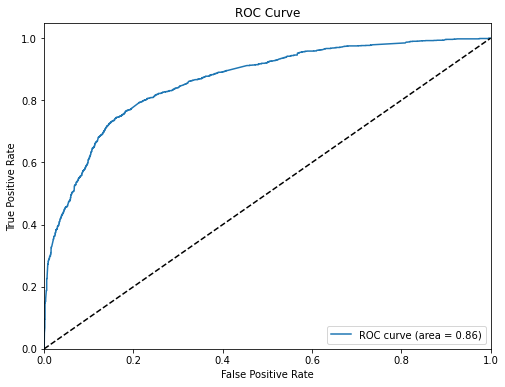

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [130]:
## Finding Optimal Cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.287577,0.287577,0,1,1,1,0,0,0,0,0,0,0
1,1,0.986768,0.986768,1,1,1,1,1,1,1,1,1,1,1
2,1,0.971209,0.971209,1,1,1,1,1,1,1,1,1,1,1
3,0,0.270706,0.270706,0,1,1,1,0,0,0,0,0,0,0
4,0,0.872752,0.872752,1,1,1,1,1,1,1,1,1,1,0


In [131]:
# Calculating Specificity, Senstivity and Accuracy at different problems
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Senstivity','Specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))    
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Senstivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Senstivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Senstivity  Specificity
0.0          0.0  0.456731    1.000000     0.000000
0.1          0.1  0.553138    0.987258     0.188170
0.2          0.2  0.678897    0.937396     0.461574
0.3          0.3  0.759868    0.861496     0.674429
0.4          0.4  0.789474    0.791690     0.787611
0.5          0.5  0.794028    0.719668     0.856544
0.6          0.6  0.775557    0.634903     0.893805
0.7          0.7  0.749747    0.541274     0.925012
0.8          0.8  0.718370    0.431025     0.959944
0.9          0.9  0.670547    0.292521     0.988356


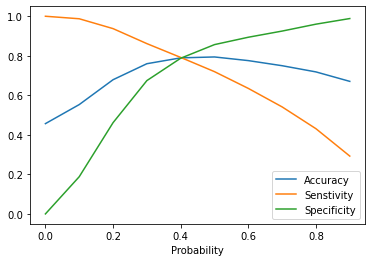

In [132]:
# Plotting Senstivity and Specificity at different levels
cutoff_df.plot.line(x='Probability', y=['Accuracy','Senstivity','Specificity'])
plt.show()

From above we can infer that <b>0.4</b> is the optimal point for Cut Off Probability

Now creating a column as <b>final_predicted</b> and marking its value as 1 if the value of Converted_prob is greater than 0.4 else mark it as 0

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

In [134]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.287577,0.287577,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.986768,0.986768,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.971209,0.971209,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.270706,0.270706,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.872752,0.872752,1,1,1,1,1,1,1,1,1,1,0,1


In [135]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

In [136]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.287577,0.287577,0,1,1,1,0,0,0,0,0,0,0,0,29
1,1,0.986768,0.986768,1,1,1,1,1,1,1,1,1,1,1,1,99
2,1,0.971209,0.971209,1,1,1,1,1,1,1,1,1,1,1,1,97
3,0,0.270706,0.270706,0,1,1,1,0,0,0,0,0,0,0,0,27
4,0,0.872752,0.872752,1,1,1,1,1,1,1,1,1,1,0,1,87


In [137]:
## Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7894736842105263

In [138]:
confusion_mat2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_mat2

array([[1691,  456],
       [ 376, 1429]], dtype=int64)

In [139]:
# True Positive
TP = confusion_mat2[1,1]
print("TP:",TP)
# True Negative
TN = confusion_mat2[0,0]
print("TN:",TN)
#False Positive
FP = confusion_mat2[0,1]
print("FP:",FP)
#False Negative
FN = confusion_mat2[1,0]
print("FN:",FN)

TP: 1429
TN: 1691
FP: 456
FN: 376


In [140]:
# Senstivity of Logistic Regression Model
Senstivity = TP / float(TP+FN)
print("Senstivity:",Senstivity)

Senstivity: 0.7916897506925208


In [141]:
# Specificity of Logistic Regression Model
Specificity = TN / float(TN+FP)
print("Specificity:",Specificity)

Specificity: 0.7876106194690266


In [142]:
False_positive_rate2 = (FP /(float(TN+FP)))
print("False Positive Rate:",False_positive_rate)

False Positive Rate: 0.14345598509548207


#### Precision and Recall

In [143]:
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion_mat

array([[1839,  308],
       [ 506, 1299]], dtype=int64)

In [144]:
#Precision=TP/(TP+FP)
Precision=confusion_mat[1,1]/(confusion_mat[0,1]+confusion_mat[1,1])
print("Precision:",Precision)

Precision: 0.8083385189794648


In [145]:
#Recall=TP /(TP + FN)
Recall=confusion_mat[1,1]/(confusion_mat[1,0]+confusion_mat[1,1])
print("Recall:",Recall)

Recall: 0.7196675900277009


In [146]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7580901856763925

In [147]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7916897506925208

#### Precision and recall tradeoff

In [148]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

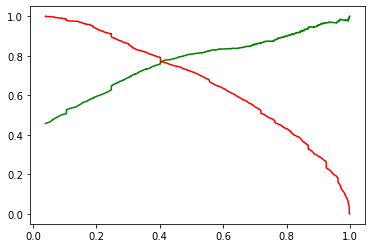

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 7: Making predictions on the test set

In [150]:
## Scaling the Test data set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,...,Course_Other,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,City_Maharashtra Cities,City_Mumbai,City_Not given,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1177,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.861813,-0.335103,-0.807712
8872,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.549070,-0.794339,1.283595
8537,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.312674,1.402927,1.283595
1406,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1.214534,-0.958604,-1.330539
5854,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.549070,-0.522330,1.283595


In [151]:
X_test = X_test[rfe_select_cols]

In [152]:
X_test.head()

,Lead_Origin_Landing Page Submission,Lead_Source_Olark Chat,Lead_Source_Reference,Last_Activity_Email Opened,Last_Activity_Others,Last_Activity_SMS Sent,Specialization_Not Provided,Occu_Working Professional,Total Time Spent on Website
1177,1,0,0,0,0,0,0,0,-0.335103
8872,1,0,0,0,0,1,0,0,-0.794339
8537,1,0,0,1,0,0,0,0,1.402927
1406,0,0,1,1,0,0,0,0,-0.958604
5854,0,0,0,0,0,1,1,0,-0.522330


In [153]:
# Adding Constant
y_test_pred = res.predict(sm.add_constant(X_test))

In [154]:
y_test_pred[:10]

1177    0.100592
8872    0.280563
8537    0.667503
1406    0.924830
5854    0.272316
2771    0.154911
2515    0.844529
2360    0.309382
7665    0.106093
6761    0.145252
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1177,0.100592
8872,0.280563
8537,0.667503
1406,0.924830
5854,0.272316


In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Combining y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [161]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,1177,0.100592
1,0,8872,0.280563
2,0,8537,0.667503
3,1,1406,0.924830
4,1,5854,0.272316


In [162]:
# Adding Lead Score column by rounding thr Converted_prob to 100
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [163]:
# Adding final_predicted column to 1 if Converted_prob is grater than 04 else 0
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [164]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,Lead_Score,final_predicted
0,0,1177,0.100592,10,0
1,0,8872,0.280563,28,0
2,0,8537,0.667503,67,1
3,1,1406,0.924830,92,1
4,1,5854,0.272316,27,0


In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8022432113341205

In [166]:
confusion_mat2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_mat2

array([[741, 195],
       [140, 618]], dtype=int64)

In [167]:
# True Positive
TP = confusion_mat2[1,1]
print("TP:",TP)
# True Negative
TN = confusion_mat2[0,0]
print("TN:",TN)
#False Positive
FP = confusion_mat2[0,1]
print("FP:",FP)
#False Negative
FN = confusion_mat2[1,0]
print("FN:",FN)

TP: 618
TN: 741
FP: 195
FN: 140


In [168]:
Senstivity = TP / (float(TP+FN))
print("Senstivity:",Senstivity)

Senstivity: 0.8153034300791556


In [169]:
Specificity = TN / (float(TN+FP))
print("Specificity:",Specificity)

Specificity: 0.7916666666666666


In [170]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7601476014760148

In [171]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8153034300791556

# Comparing the Train and Test Set

## <u>Outputs from the Train Set:</u>
- <b>Accuracy</b> - 78.94%
- <b>Sensitivity</b> - 79.16%
- <b>Specificity</b> - 78.76%

## <u>Outputs from the Test Set:</u>
- <b>Accuracy</b> - 80.22%
- <b>Sensitivity</b> - 81.53%
- <b>Specificity</b> - 79.16%